In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [3]:
#importing the dataset
data = pd.read_csv("../input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
#counting the number of columns to set X and y
len(data. columns)

16

In [5]:
#find the missing values and dropping them
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.shape

(4238, 16)

In [7]:
data.dropna(inplace=True)

In [8]:
#selecting x and y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
y_preds= model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[776   4]
 [130   4]]


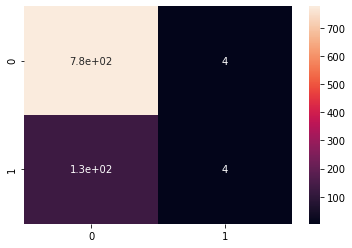

In [14]:
import seaborn as sns
sns.heatmap(cm,annot = True)

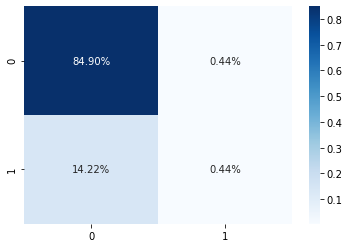

In [15]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '.2%', cmap='Blues')

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preds))

0.8533916849015317
